# IMDB Movie Data Analysis.

IMDB Movie Data contains information about the movies released in the past many years. This dataset contains information about the Movie right from the Directors to the Actors involved, Budget in which the film was made to the Gross it earned, movie's content rating, imdb score etc. 
<br>I plan to do an analysis on the same data to support the SussexBudgetProductions and to come up with a few suggestions to work on by keeping in mind the budget so that the company gets a great return with maximum profit. 

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [14]:
#Reading the data file
file="movie_metadata.csv"
data=pd.read_csv(file)

In [4]:
#head() function is used to retrive the first n rows. Default n=5. 
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


<b> Exploratory Data Analysis

Exploratory Data Analysis is a method of systematically going through the data, computing summary statistics and finding the relationships between all the variables. 
Lets first go through the data and get to know about the contents.

In [56]:
#.columns can be used for retrieving all the column names in the dataset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [57]:
#.shape can be used for counting the number of rows and columns in the dataset
data.shape
#here 5043=number of rows and 28=number of columns

(5043, 28)

In [58]:
#.dtypes return the data type of each column
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

<b> Data Cleaning

Every dataset can contain dirty,null,unnecessary,corrupt values. Therefore, before proceeding with the computation,
cleaning or cleansing of the data is essential. Data Cleaning or Data Cleansing is the process of removing corrupt or 
inaccurate entries from the dataset. 

In [59]:
#All the columns in the dataset are not required for statistical computation. Therefore, removing unnecessary columns can
#be very helpful while managing such large amount of data. 
newData=data.drop(['color','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes',
          'actor_2_facebook_likes','movie_facebook_likes','actor_2_name','aspect_ratio','duration',               
          'facenumber_in_poster','cast_total_facebook_likes','actor_3_name','plot_keywords','movie_imdb_link'],axis=1)
#All the above mentioned columns are not included in 'newData'. Here axis=1 denotes column. axis=0 denpotes row.

In [60]:
#.isnull().sum() returns the number of null values in each column. e.g. Column 'director_name' contains 104 null values whereas
#Column 'genre' contains 0 null values. Therefore, working upon such null values is very important
newData.isnull().sum()

director_name             104
num_critic_for_reviews     50
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            303
budget                    492
title_year                108
imdb_score                  0
dtype: int64

We cant predict the values of Categorical columns like genres,movie_title,language,country etc when such columns are null in a row. 
<br>Placing the most common option can be a solution but not the optimum one in such cases. 
<br>Here rows where genres,language,country,movie_title,content_rating are null are being dropped. 

In [61]:
newData=newData.dropna(axis=0,subset=['genres'])
newData=newData.dropna(axis=0,subset=['language'])
newData=newData.dropna(axis=0,subset=['country'])
newData=newData.dropna(axis=0,subset=['movie_title'])
newData=newData.dropna(axis=0,subset=['content_rating'])
newData=newData.dropna(axis=0,subset=['budget'])
newData=newData.dropna(axis=0,subset=['gross'])

In [62]:
#Replacing all the null values with 0.0 in num_critic_for_reviews,num_voted_users,num_user_for_reviews.
newData['num_critic_for_reviews']=newData['num_critic_for_reviews'].fillna(0.0)
newData['num_voted_users']=newData['num_voted_users'].fillna(0.0)
newData['num_user_for_reviews']=newData['num_user_for_reviews'].fillna(0.0)

In [63]:
#Removing duplicate entry rows
newData.drop_duplicates(keep='first',inplace=True)

In [64]:
print("Rows and columns in the cleaned dataset is",newData.shape)
print("After deleting a few rows and columns, the amount of data inplace is",(len(newData)/len(data))*100)

Rows and columns in the cleaned dataset is (3803, 14)
After deleting a few rows and columns, the amount of data inplace is 75.41146143168748


In [65]:
#Adding a new column 'Profit'.
newData['profit']=newData['gross']-newData['budget']
newData.sort_values(by='profit',ascending=False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,2.370000e+08,2009.0,7.9,5.235058e+08
29,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,USA,PG-13,1.500000e+08,2015.0,7.0,5.021773e+08
26,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,USA,PG-13,2.000000e+08,1997.0,7.7,4.586723e+08
3024,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,USA,PG,1.100000e+07,1977.0,8.7,4.499357e+08
3080,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,USA,PG,1.050000e+07,1982.0,7.9,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,6.9,-2.127110e+09
2323,Hayao Miyazaki,174.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,8.4,-2.397702e+09
3005,Lajos Koltai,73.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,7.1,-2.499804e+09
3859,Chan-wook Park,202.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,South Korea,R,4.200000e+09,2005.0,7.7,-4.199788e+09


<b> Summary Statistics

Once the data is cleaned, we need to understand the statistics of the data. Statistical Analysis tells us about the data. 
Statistical knowledge helps you to employ the correct analyses and effectively present the results.

In [66]:
#describe() gives all the statistical information like mean, count, standard deviation,inter-quartile range, median, min, max 
#for all the numerical columns
newData.describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit
count,3803.000000,3.803000e+03,3.803000e+03,3803.000000,3.803000e+03,3803.000000,3803.000000,3.803000e+03
mean,164.707073,5.162060e+07,1.036622e+05,330.271891,4.549509e+07,2003.049172,6.460373,6.125502e+06
std,123.795524,6.953664e+07,1.508775e+05,409.231152,2.246510e+08,9.950321,1.054882,2.283890e+08
min,0.000000,1.620000e+02,2.200000e+01,1.000000,2.180000e+02,1927.000000,1.600000,-1.221330e+10
25%,74.500000,7.376183e+06,1.807550e+04,105.000000,1.000000e+07,1999.000000,5.900000,-1.022106e+07
50%,136.000000,2.877222e+07,5.242100e+04,205.000000,2.500000e+07,2005.000000,6.600000,1.177215e+06
75%,222.000000,6.630848e+07,1.252620e+05,393.000000,5.000000e+07,2010.000000,7.200000,2.505970e+07
max,813.000000,7.605058e+08,1.689764e+06,5060.000000,1.221550e+10,2016.000000,9.300000,5.235058e+08


Budget, Gross and Profit are the 3 most important columns when considering the statisics of this movie dataset. Let us find 
whether there are any correlation between these 3 columns. 

Gross Vs Budget

Text(0, 0.5, 'Gross')

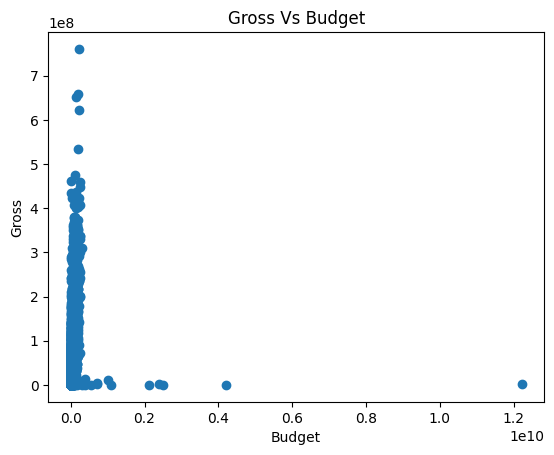

In [67]:
plt.scatter(newData['budget'],newData['gross'])
plt.title("Gross Vs Budget")
plt.xlabel("Budget")
plt.ylabel("Gross")

From the above Budget vs Gross scatterplot, we can conclude that Gross does not depend on Budget.

Budget VS Profit

Text(0, 0.5, 'Profit')

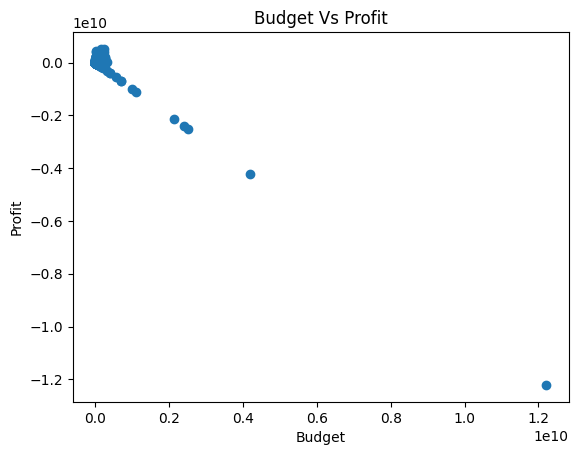

In [68]:
plt.scatter(newData['budget'],newData['profit'])
plt.title("Budget Vs Profit")
plt.xlabel("Budget")
plt.ylabel("Profit")

From the above Budget vs Profit scatterplot, we can conclude that Profit does not increase with increase in Budget.

Heatmap is seaborn method that can be used for finding the correlation between different numerical columns. The correlation value can lie anywhere between -1 and +1. 
<br>+1 means Postive correlation. It means if one of the values increases, then the other value will increase. 
<br>-1 means Negative correlation. It means if one of the values increases, then the other value will decrease. 
<br>0 means no correlation

C:\Users\HP\AppData\Local\Temp\ipykernel_8432\2937528185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=newData.corr()


Text(0.5, 1.0, 'Correlation Coefficients of different numerical fields')

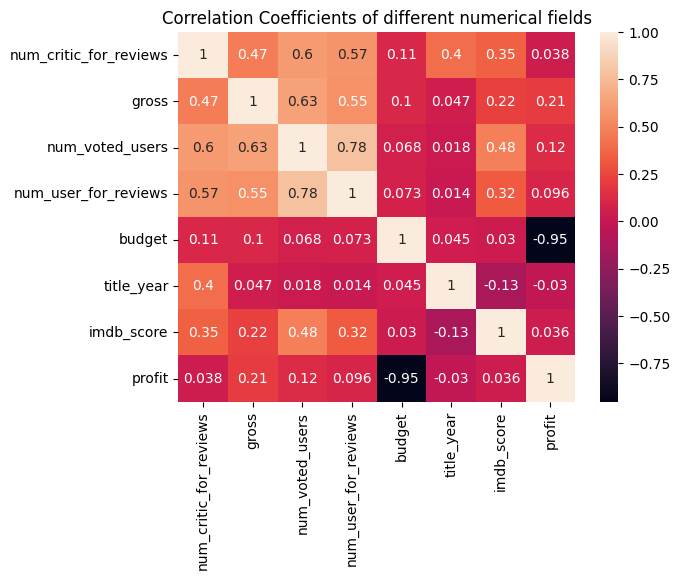

In [104]:
correlation=newData.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.title("Correlation Coefficients of different numerical fields")

Text(0.5, 1.0, 'Pairplot depicting relationship between different numerical variables')

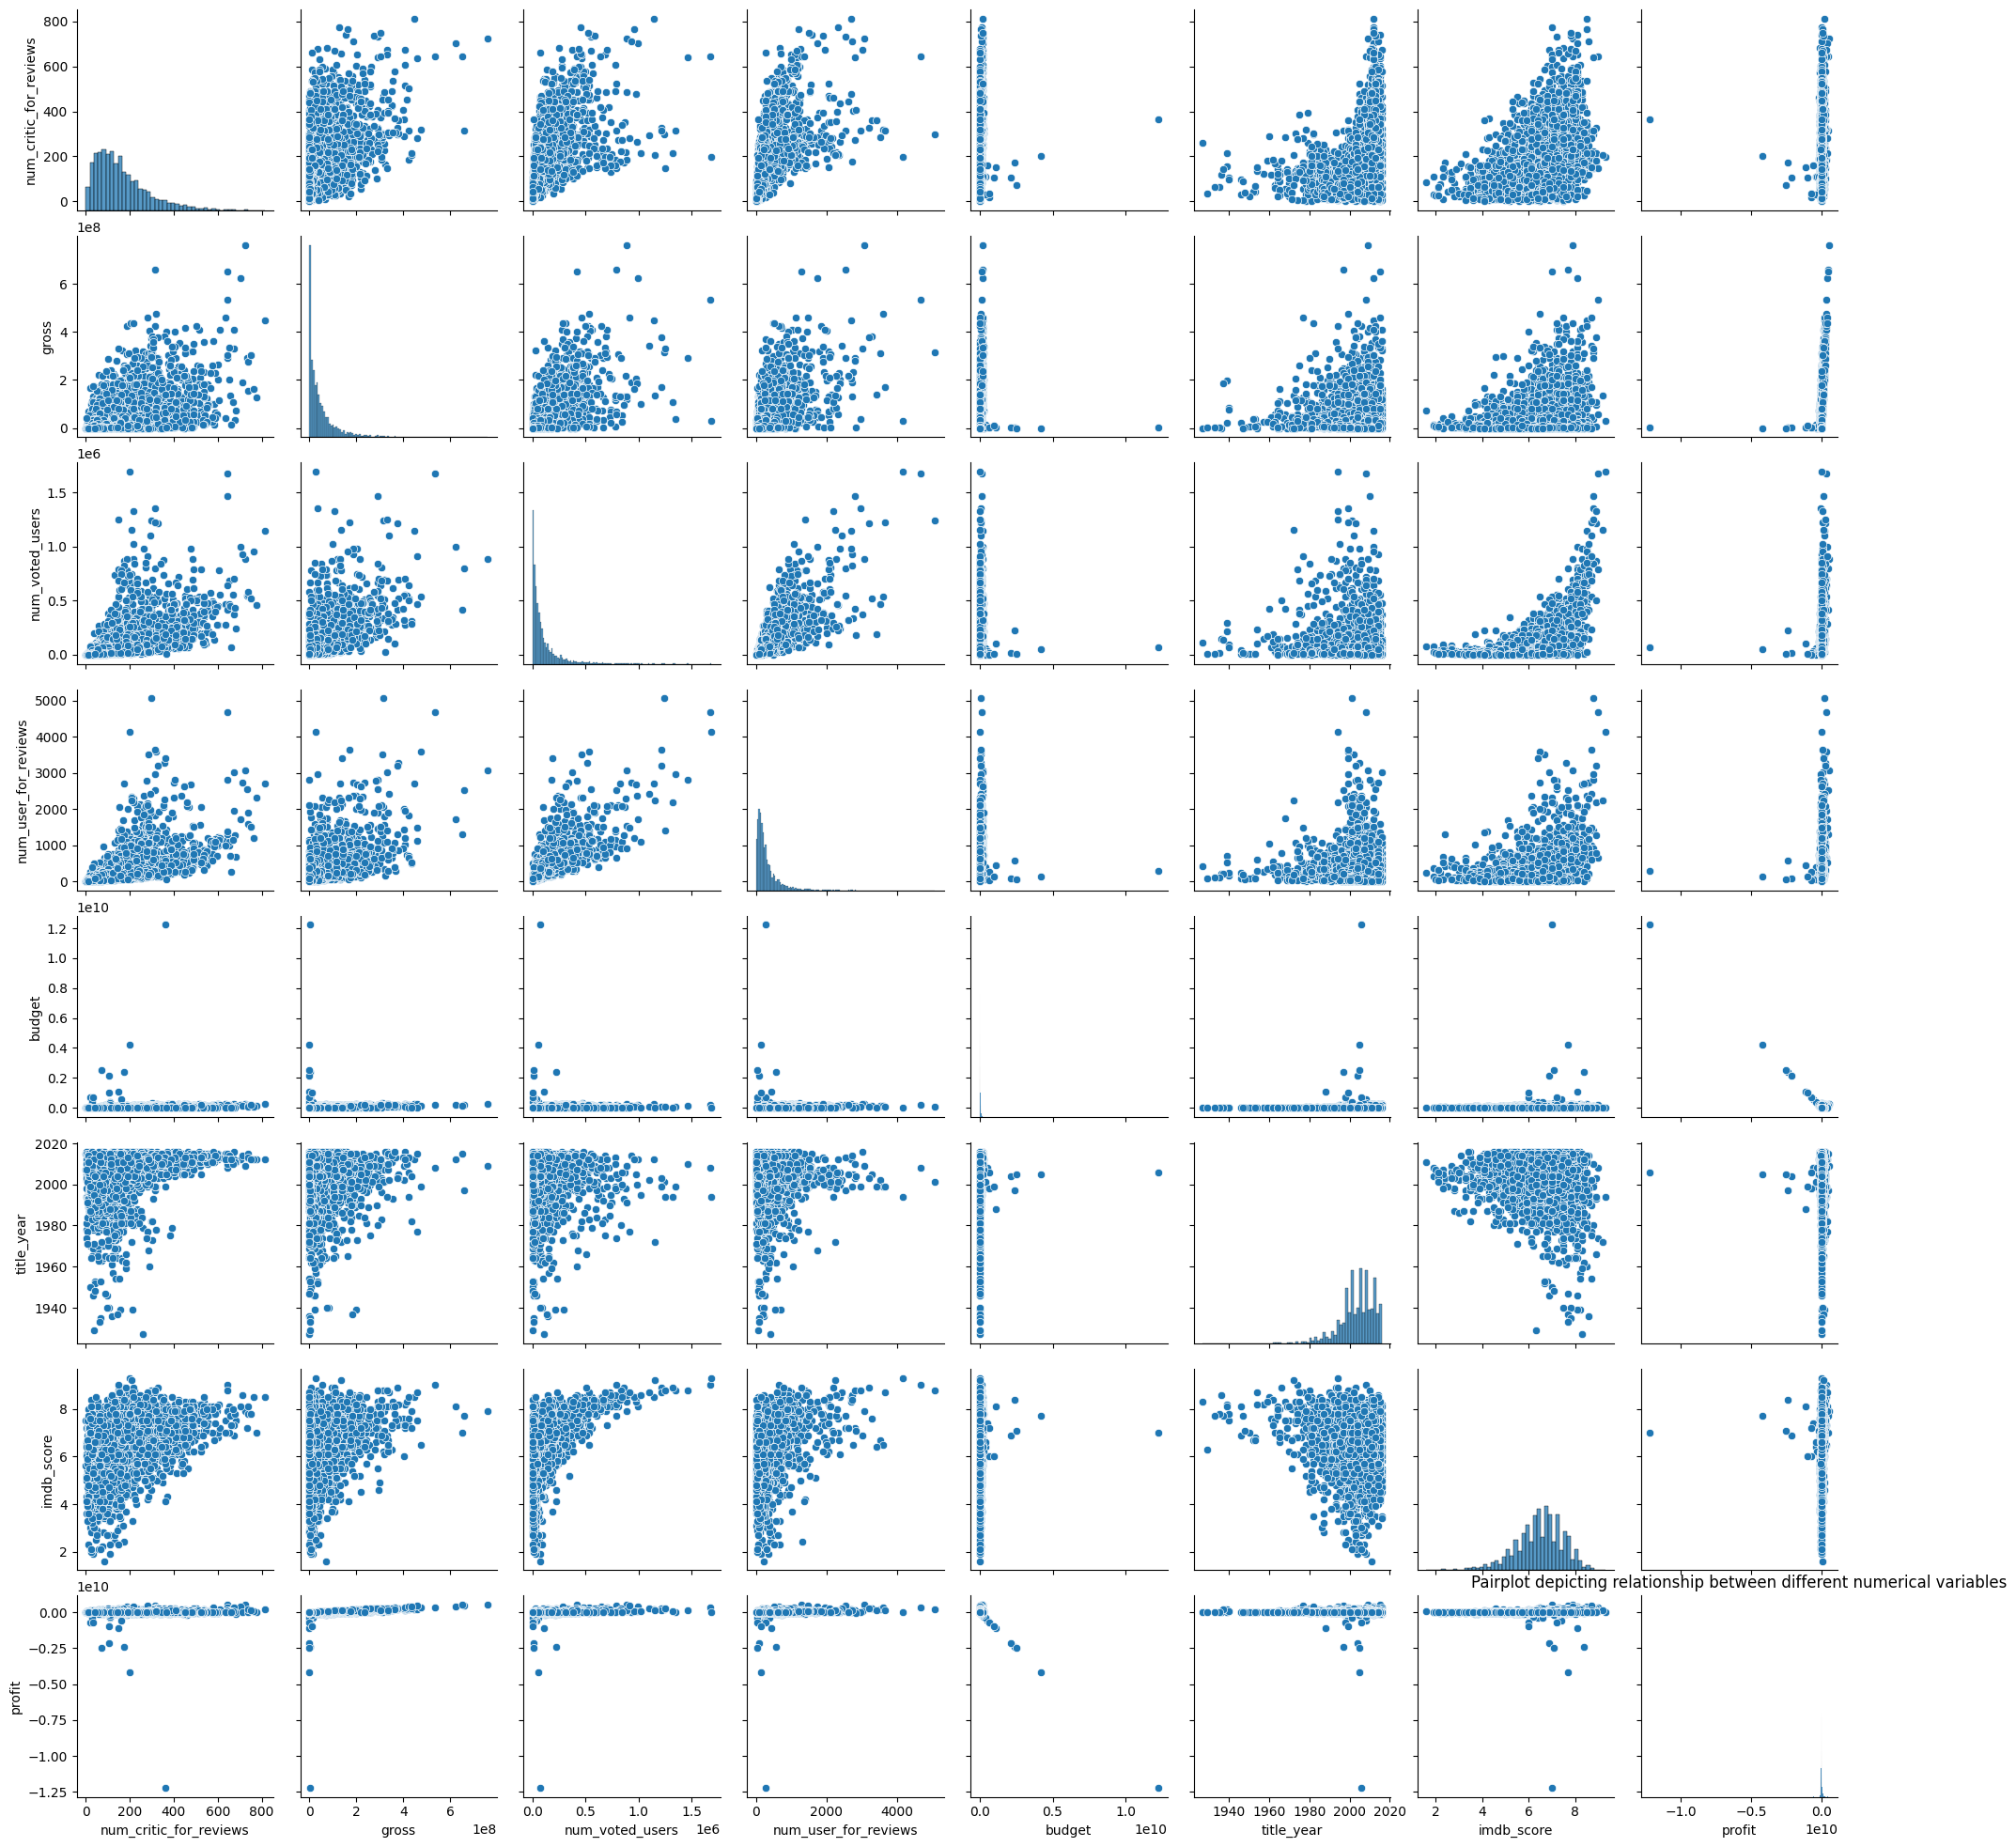

In [70]:
sns.pairplot(newData)
plt.title("Pairplot depicting relationship between different numerical variables")

So here gross and num_votes_users have a correlation of 0.63 which can be considered as a Positive Correlation. It means that if 
the Gross increases then Number of Users who would vote(num_votes_users) shall increase or vice versa. But we wont be considering num_voted_user as an ideal parameter for the analysis.

<b>Analysis Based on Genre

Genres column in the dataset is a combination of couple of genres. I am splitting the entire genres column to different set of
genres. If you consider the dataset, there are genres upto 5 values. Therefore, splitting the entire dataset to 5 columns.

In [71]:
genresAvailable= newData['genres'].str.split('|',expand=True).iloc[:,0:5]
genresAvailable.columns=['genre1','genre2','genre3','genre4','genre5']
genresAvailable

,genre1,genre2,genre3,genre4,genre5
0,Action,Adventure,Fantasy,Sci-Fi,None
1,Action,Adventure,Fantasy,None,None
2,Action,Adventure,Thriller,None,None
3,Action,Thriller,None,None,None
5,Action,Adventure,Sci-Fi,None,None
...,...,...,...,...,...
5033,Drama,Sci-Fi,Thriller,None,None
5034,Thriller,None,None,None,None
5035,Action,Crime,Drama,Romance,Thriller
5037,Comedy,Drama,None,None,None


In [72]:
newData=pd.concat([newData,genresAvailable],axis=1)
#Concatenating newData1 to the original cleaned newData 

In [73]:
newData

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,profit,genre1,genre2,genre3,genre4,genre5
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,523505847.0,Action,Adventure,Fantasy,Sci-Fi,None
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,9404152.0,Action,Adventure,Fantasy,None,None
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,-44925825.0,Action,Adventure,Thriller,None,None
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,198130642.0,Action,Thriller,None,None,None
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,-190641321.0,Action,Adventure,Sci-Fi,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,PG-13,7000.0,2004.0,7.0,417760.0,Drama,Sci-Fi,Thriller,None,None
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,Not Rated,7000.0,2005.0,6.3,63071.0,Thriller,None,None,None,None
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,R,7000.0,1992.0,6.9,2033920.0,Action,Crime,Drama,Romance,Thriller
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,Not Rated,9000.0,2011.0,6.4,-4416.0,Comedy,Drama,None,None,None


CEO thinks he can persuade investors to give £1.5 million. Therefore the maximum budget = 1500000.
Considering that good movies have atleast 6 as the IMDB Score. 
Filtering out the data based on the budget and imdb_score

In [74]:
maxBudget=1500000
min_imdbscore=6
withinBudget=(newData[(newData['budget']<=maxBudget) & (newData['imdb_score']>=min_imdbscore)])
withinBudget.sort_values('profit',ascending=False)    

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,profit,genre1,genre2,genre3,genre4,genre5
4707,Daniel Myrick,360.0,140530114.0,Horror,Heather Donahue,The Blair Witch Project,186786,3400.0,English,USA,R,60000.0,1999.0,6.4,140470114.0,Horror,None,None,None,None
4530,John G. Avildsen,141.0,117235247.0,Drama|Sport,Sylvester Stallone,Rocky,375240,542.0,English,USA,PG,960000.0,1976.0,8.1,116275247.0,Drama,Sport,None,None,None
4674,George Lucas,100.0,115000000.0,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238.0,English,USA,PG,777000.0,1973.0,7.5,114223000.0,Comedy,Drama,Music,None,None
4793,Oren Peli,409.0,107917283.0,Horror,Micah Sloat,Paranormal Activity,184824,1189.0,English,USA,R,15000.0,2007.0,6.3,107902283.0,Horror,None,None,None,None
4485,James Wan,287.0,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,1509.0,English,USA,R,1200000.0,2004.0,7.7,53953403.0,Horror,Mystery,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,Charles Chaplin,120.0,163245.0,Comedy|Drama|Family,Paulette Goddard,Modern Times,143086,211.0,English,USA,G,1500000.0,1936.0,8.6,-1336755.0,Comedy,Drama,Family,None,None
4395,Eytan Fox,51.0,155972.0,Comedy|Drama|Romance,Ohad Knoller,The Bubble,4702,23.0,Hebrew,Israel,Unrated,1500000.0,2006.0,7.3,-1344028.0,Comedy,Drama,Romance,None,None
4452,Zak Penn,60.0,36830.0,Adventure|Comedy|Horror,Zak Penn,Incident at Loch Ness,3291,63.0,English,UK,PG-13,1400000.0,2004.0,6.6,-1363170.0,Adventure,Comedy,Horror,None,None
4428,Pete Jones,31.0,119841.0,Drama,Brian Dennehy,Stolen Summer,2419,55.0,English,USA,PG,1500000.0,2002.0,6.5,-1380159.0,Drama,None,None,None,None


In [75]:
withinBudget

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,profit,genre1,genre2,genre3,genre4,genre5
1281,Martin Scorsese,112.0,32645.0,Crime|Drama|Romance|Thriller,Robert De Niro,Mean Streets,67797,223.0,English,USA,R,500000.0,1973.0,7.4,-467355.0,Crime,Drama,Romance,Thriller,None
2242,Alfred Hitchcock,290.0,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1040.0,English,USA,R,806947.0,1960.0,8.5,31193053.0,Horror,Mystery,Thriller,None,None
2420,John Carpenter,212.0,21378000.0,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,335.0,English,USA,R,1000000.0,1980.0,6.8,20378000.0,Fantasy,Horror,None,None,None
2492,John Carpenter,318.0,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,R,300000.0,1978.0,7.9,46700000.0,Horror,Thriller,None,None,None
3278,Tobe Hooper,277.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,826.0,English,USA,R,83532.0,1974.0,7.5,30775468.0,Horror,Thriller,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,PG-13,7000.0,2004.0,7.0,417760.0,Drama,Sci-Fi,Thriller,None,None
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,Not Rated,7000.0,2005.0,6.3,63071.0,Thriller,None,None,None,None
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,R,7000.0,1992.0,6.9,2033920.0,Action,Crime,Drama,Romance,Thriller
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,Not Rated,9000.0,2011.0,6.4,-4416.0,Comedy,Drama,None,None,None


In [76]:
withinBudget.describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit
count,215.000000,2.150000e+02,215.000000,215.000000,2.150000e+02,215.000000,215.000000,2.150000e+02
mean,106.213953,6.797875e+06,43399.441860,199.390698,6.741329e+05,1998.009302,7.026977,6.123742e+06
std,94.710680,1.840240e+07,86629.743427,334.873495,4.675333e+05,15.177452,0.630174,1.842572e+07
min,2.000000,1.111000e+03,48.000000,2.000000,2.180000e+02,1929.000000,6.000000,-1.496522e+06
25%,35.000000,1.988510e+05,3024.500000,38.500000,2.400000e+05,1997.000000,6.500000,-4.126690e+05
50%,74.000000,1.027119e+06,11816.000000,89.000000,6.090000e+05,2002.000000,7.000000,4.853410e+05
75%,143.000000,4.056458e+06,44301.000000,213.000000,1.000000e+06,2007.000000,7.500000,3.244646e+06
max,481.000000,1.405301e+08,664719.000000,3400.000000,1.500000e+06,2014.000000,8.900000,1.404701e+08


Finding the Profitable Genre

In [77]:
genreProfit=withinBudget.groupby('genre1')[['profit']].mean()
genreProfit.sort_values('profit',ascending=False)

,profit
genre1,
Horror,4.008514e+07
Fantasy,2.106293e+07
Adventure,8.463321e+06
Western,4.900000e+06
Action,4.790548e+06
Drama,4.482120e+06
Comedy,3.558595e+06
Biography,3.403595e+06
Musical,2.429000e+06


<AxesSubplot: title={'center': 'Genre Vs Profit'}, xlabel='Genre', ylabel='Profit'>

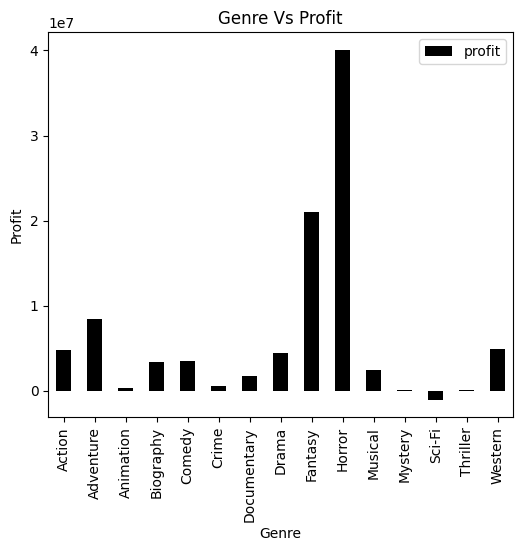

In [78]:
genreProfit.plot(kind='bar', title='Genre Vs Profit', ylabel='Profit',xlabel='Genre', figsize=(6, 5),color='Black')

From the above barchart of Genre1 Vs Profit, we can say that 'Horror' is the most profitable genre in genre1 column.

<b>Genre VS Number of Critics for Reviews

Let us check what are the popular genres among critics.

In [79]:
withinBudget.groupby('genre1').num_critic_for_reviews.mean().sort_values(ascending=False)  

genre1
Horror         269.769231
Fantasy        250.000000
Biography      219.142857
Western        181.000000
Action         131.000000
Animation      125.000000
Crime          116.888889
Mystery         99.000000
Sci-Fi          97.000000
Drama           92.375000
Comedy          80.468354
Adventure       77.166667
Documentary     43.875000
Musical         36.000000
Thriller        35.000000
Name: num_critic_for_reviews, dtype: float64

Text(0, 0.5, 'Number of Critics for Reviews')

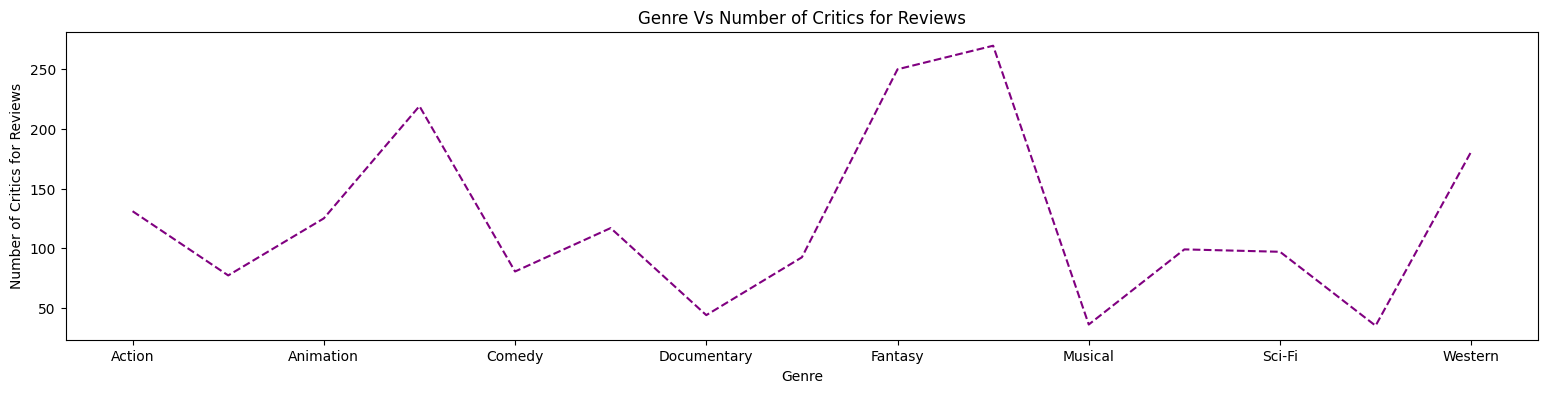

In [81]:
withinBudget.groupby('genre1')['num_critic_for_reviews'].mean().plot(linestyle='dashed',linewidth=1.5,figsize=(19, 4),color="Purple")
plt.title("Genre Vs Number of Critics for Reviews")
plt.xlabel("Genre")
plt.ylabel("Number of Critics for Reviews")

Horror Genre has the maximum number of Critics for Reviews. 
Therefore,we can say that Horror is a popular genre across critics. 

<b>Genre VS Number of Voted Users for Reviews

Let us check what are the popular genres among IMDB users/audiences.

In [82]:
withinBudget.groupby('genre1').num_voted_users.mean().sort_values(ascending=False)

genre1
Western        503509.000000
Mystery        160511.000000
Horror         134858.230769
Fantasy         78880.800000
Adventure       72092.833333
Crime           70542.388889
Action          69235.625000
Drama           31110.250000
Comedy          27573.468354
Biography       27397.714286
Animation       23767.500000
Sci-Fi           6555.000000
Documentary      5725.437500
Musical          4546.000000
Thriller          589.000000
Name: num_voted_users, dtype: float64

Text(0.5, 1.0, 'Genre Vs Number of Voted Users')

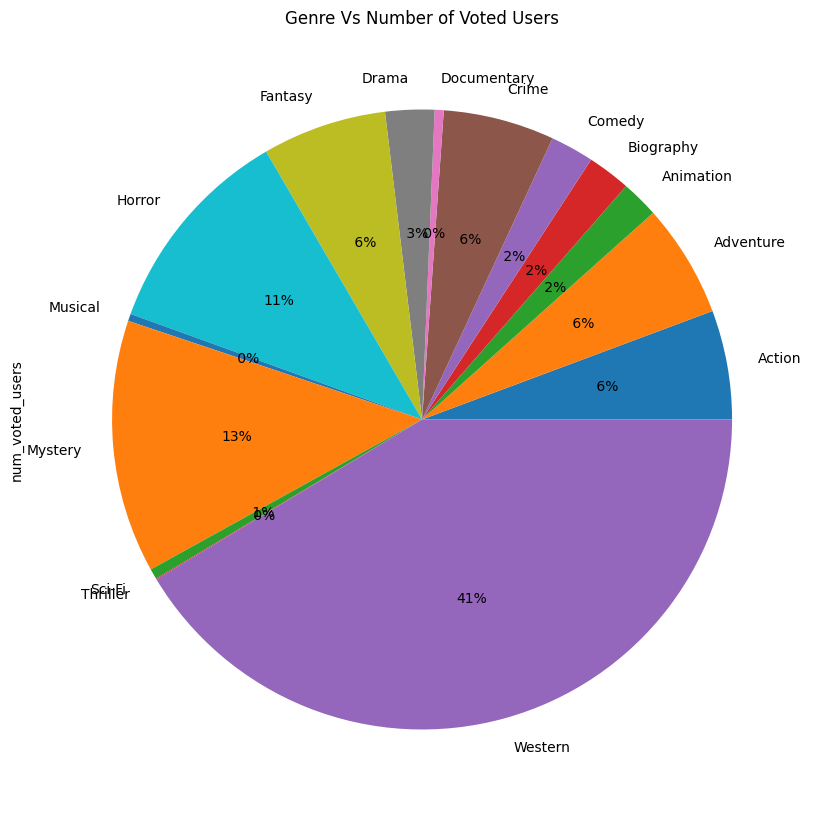

In [83]:
withinBudget.groupby('genre1').num_voted_users.mean().plot.pie(autopct="%2.0f%%",figsize=(10,100),subplots=True)
plt.title("Genre Vs Number of Voted Users")

We can say that there is a very good number of reviewers who has voted for Horror Genre.

<b>From the above analysis, we can conclude that Horror is the most profitable genre and the same genre has been voted for by the critics and the users. That means we can conclude that the Horror genre is liked by both the Users/Audiences and the critics.<b>

<b>Hypothesis: If movies are made in 'Horror' genre or has an Horror Element, then the profit earned would be more.<b>

<b>Let us make a table of all the movies which has Horror Element in  it and find all the statistics.<b>

In [84]:
horrorMovies=(withinBudget[(withinBudget['genre1']=='Horror')| (withinBudget['genre2']== 'Horror') | (withinBudget['genre3']== 'Horror') | (withinBudget['genre4']== 'Horror') | (withinBudget['genre5']== 'Horror')])
horrorMovies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,profit,genre1,genre2,genre3,genre4,genre5
2242,Alfred Hitchcock,290.0,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1040.0,English,USA,R,806947.0,1960.0,8.5,31193053.0,Horror,Mystery,Thriller,None,None
2420,John Carpenter,212.0,21378000.0,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,335.0,English,USA,R,1000000.0,1980.0,6.8,20378000.0,Fantasy,Horror,None,None,None
2492,John Carpenter,318.0,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,R,300000.0,1978.0,7.9,46700000.0,Horror,Thriller,None,None,None
3278,Tobe Hooper,277.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,826.0,English,USA,R,83532.0,1974.0,7.5,30775468.0,Horror,Thriller,None,None,None
3941,Robert Lee King,51.0,265107.0,Comedy|Horror|Mystery,Lauren Ambrose,Psycho Beach Party,4617,93.0,English,Australia,Unrated,1500000.0,2000.0,6.3,-1234893.0,Comedy,Horror,Mystery,None,None
3950,Jim Mickle,215.0,18469.0,Drama|Horror|Sci-Fi,Connor Paolo,Stake Land,34263,141.0,English,USA,R,650000.0,2010.0,6.5,-631531.0,Drama,Horror,Sci-Fi,None,None
4376,Lucky McKee,114.0,145540.0,Drama|Horror,James Duval,May,26773,277.0,English,USA,R,500000.0,2002.0,6.7,-354460.0,Drama,Horror,None,None,None
4413,James Wan,445.0,53991137.0,Fantasy|Horror|Mystery|Thriller,Lin Shaye,Insidious,202800,752.0,English,USA,PG-13,1500000.0,2010.0,6.8,52491137.0,Fantasy,Horror,Mystery,Thriller,None
4423,Brad Anderson,127.0,373967.0,Horror|Mystery,Paul Guilfoyle,Session 9,43839,481.0,English,USA,R,1500000.0,2001.0,6.5,-1126033.0,Horror,Mystery,None,None,None
4434,Bruce McDonald,178.0,3478.0,Fantasy|Horror,Stephen McHattie,Pontypool,22212,142.0,English,Canada,Not Rated,1500000.0,2008.0,6.7,-1496522.0,Fantasy,Horror,None,None,None


In [85]:
horrorMovies.shape

(29, 20)

In [86]:
horrorMovies.describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit
count,29.000000,2.900000e+01,29.000000,29.000000,2.900000e+01,29.000000,29.000000,2.900000e+01
mean,213.275862,2.228372e+07,80734.620690,554.103448,6.968624e+05,1992.172414,6.824138,2.158685e+07
std,103.922326,3.387886e+07,99892.874572,690.041010,5.208798e+05,16.932785,0.598603,3.402212e+07
min,51.000000,3.478000e+03,3291.000000,52.000000,1.000000e+04,1953.000000,6.100000,-1.496522e+06
25%,127.000000,1.006590e+05,16792.000000,142.000000,2.100000e+05,1980.000000,6.400000,-4.770000e+05
50%,212.000000,5.000000e+06,39690.000000,277.000000,6.500000e+05,2000.000000,6.700000,4.790000e+06
75%,277.000000,3.085900e+07,96411.000000,826.000000,1.000000e+06,2007.000000,7.000000,3.077547e+07
max,445.000000,1.405301e+08,422432.000000,3400.000000,1.500000e+06,2013.000000,8.500000,1.404701e+08


In [87]:
horror_means=horrorMovies['profit'].mean()   #Mean of all the Horror Movies
horror_std=horrorMovies['profit'].std()      #Standard Devioation of all the Horror Movies
horror_count=horrorMovies['profit'].count()  #Count of all the Horror Movies
print("Mean of all the Horror Movies",horror_means)
print("Standard Devioation of all the Horror Movies",horror_std)
print("Count of all the Horror Movies",horror_count)

Mean of all the Horror Movies 21586854.96551724
Standard Devioation of all the Horror Movies 34022115.9204959
Count of all the Horror Movies 29


<b>Profitable Country for Horror Movies

Let us check whether there is any specific country among the Horror Movies where maximum profit can be earned.

In [88]:
horrorMovies.groupby('country')[['profit']].mean().sort_values('profit',ascending=False)

,profit
country,
USA,2.809341e+07
UK,3.909051e+06
Italy,-2.736130e+05
Norway,-7.582910e+05
Australia,-1.234893e+06
Canada,-1.496522e+06


Text(0, 0.5, 'Profit')

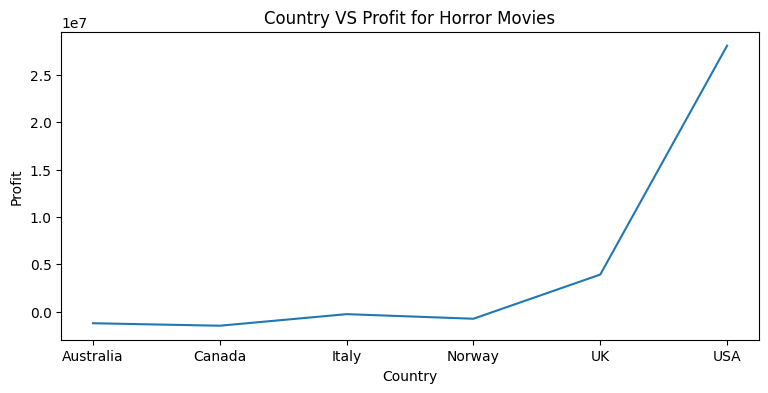

In [89]:
horrorMovies.groupby('country').profit.mean().plot(figsize=(9, 4))
plt.title("Country VS Profit for Horror Movies")
plt.xlabel("Country")
plt.ylabel("Profit")

From the above graph, we can conclude that USA generates the maximum profit when Horror Movies are made.

<b>Profitable Language for Horror Movies

Let us check whether there is any specific language among the Horror Movies where maximum profit can be earned.

In [90]:
horrorMovies.groupby("language")[['profit']].mean().sort_values('profit',ascending=False)

,profit
language,
English,2.322410e+07
Italian,-2.736130e+05
Norwegian,-7.582910e+05


<AxesSubplot: title={'center': 'Language Vs Profit for Horror Movies'}, xlabel='Language', ylabel='Profit'>

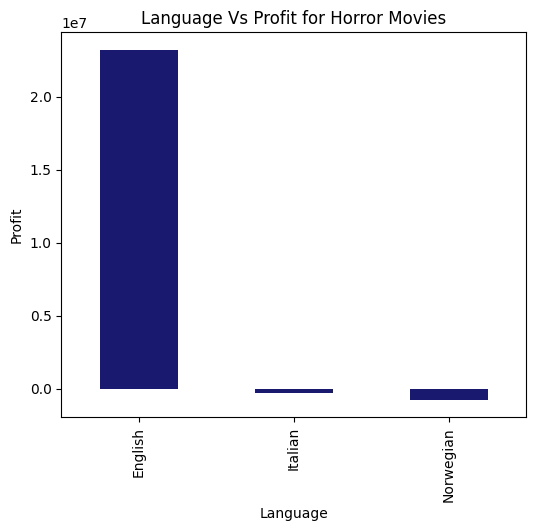

In [91]:
horrorMovies.groupby("language").profit.mean().plot(kind='bar', title='Language Vs Profit for Horror Movies', ylabel='Profit',xlabel='Language', figsize=(6, 5),color='midnightblue')

From the above graph, we can conclude that English Language generates the maximum profit when Horror Movies are made.

<b> Profitable Content Rating for Horror Movies

In [93]:
horrorMovies.groupby("content_rating")[['profit']].mean().sort_values('profit',ascending=False)

,profit
content_rating,
R,3.380673e+07
PG-13,2.556398e+07
Approved,4.790000e+06
NC-17,1.704830e+05
PG,7.053600e+04
X,-2.736130e+05
Not Rated,-7.172842e+05
Unrated,-8.559465e+05


<AxesSubplot: title={'center': 'Content Rating Vs Profit for Horror Movies'}, xlabel='Content Rating', ylabel='Profit'>

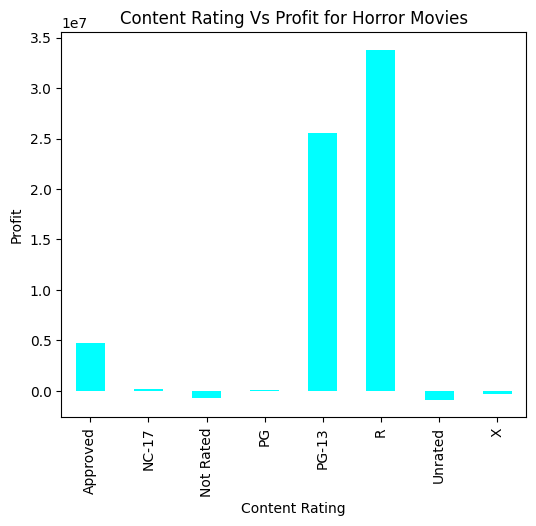

In [94]:
horrorMovies.groupby("content_rating").profit.mean().plot(kind='bar', title='Content Rating Vs Profit for Horror Movies', ylabel='Profit',xlabel='Content Rating', figsize=(6, 5),color='cyan')

From the above graph, we can conclude that content rating "R" generates the maximum profit when Horror Movies are made.

<b>Let us make a table of all the movies which does not have Horror Element in it.<b>

In [95]:
noHorror=(withinBudget[(withinBudget['genre1']!='Horror') & (withinBudget['genre2']!= 'Horror') & (withinBudget['genre3']!= 'Horror') & (withinBudget['genre4']!= 'Horror') & (withinBudget['genre5']!= 'Horror')])
noHorror

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,profit,genre1,genre2,genre3,genre4,genre5
1281,Martin Scorsese,112.0,32645.0,Crime|Drama|Romance|Thriller,Robert De Niro,Mean Streets,67797,223.0,English,USA,R,500000.0,1973.0,7.4,-467355.0,Crime,Drama,Romance,Thriller,None
3821,Billy Bob Thornton,104.0,24475416.0,Drama,Robert Duvall,Sling Blade,72443,309.0,English,USA,R,890000.0,1996.0,8.0,23585416.0,Drama,None,None,None,None
4147,Susan Seidelman,35.0,3123749.0,Comedy|Romance,Dyan Cannon,Boynton Beach Club,746,27.0,English,USA,R,1500000.0,2005.0,6.5,1623749.0,Comedy,Romance,None,None,None
4216,Shane Meadows,172.0,327919.0,Crime|Drama,Stephen Graham,This Is England,99177,192.0,English,UK,Unrated,1500000.0,2006.0,7.7,-1172081.0,Crime,Drama,None,None,None
4268,Catherine Hardwicke,126.0,4599680.0,Drama,Holly Hunter,Thirteen,68222,545.0,English,USA,R,1500000.0,2003.0,6.8,3099680.0,Drama,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,PG-13,7000.0,2004.0,7.0,417760.0,Drama,Sci-Fi,Thriller,None,None
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,Not Rated,7000.0,2005.0,6.3,63071.0,Thriller,None,None,None,None
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,R,7000.0,1992.0,6.9,2033920.0,Action,Crime,Drama,Romance,Thriller
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,Not Rated,9000.0,2011.0,6.4,-4416.0,Comedy,Drama,None,None,None


In [56]:
noHorror.shape

(251, 20)

In [50]:
noHorror.describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,profit
count,251.000000,2.510000e+02,251.000000,251.000000,2.510000e+02,249.000000,251.000000,2.510000e+02
mean,82.207171,9.856386e+06,37732.434263,140.872510,6.991658e+05,1995.586345,7.103586,9.157220e+06
std,78.214403,1.467079e+07,86540.888561,194.850321,4.656140e+05,19.780284,0.677191,1.463331e+07
min,0.000000,1.111000e+03,6.000000,0.000000,2.180000e+02,1929.000000,6.000000,-1.380159e+06
25%,28.000000,4.010350e+05,2336.500000,30.500000,2.500000e+05,1995.000000,6.600000,-4.482150e+04
50%,59.000000,2.365931e+06,7870.000000,74.000000,7.000000e+05,2002.000000,7.100000,1.659955e+06
75%,112.000000,2.551750e+07,30355.000000,170.000000,1.000000e+06,2007.000000,7.500000,2.406750e+07
max,481.000000,1.172352e+08,664719.000000,1473.000000,1.500000e+06,2014.000000,8.900000,1.162752e+08


In [96]:
noHorror_means=noHorror['profit'].mean()     #Mean of all the Horror Movies
noHorror_std=noHorror['profit'].std()        #Standard Devioation of all the Horror Movies
noHorror_count=noHorror['profit'].count()    #Count of all the Horror Movies
print("Mean of all the non Horror Movies",noHorror_means)
print("Standard Devioation of all the non Horror Movies",noHorror_std)
print("Count of all the non Horror Movies",noHorror_count)

Mean of all the non Horror Movies 3712826.489247312
Standard Devioation of all the non Horror Movies 13198927.151270721
Count of all the non Horror Movies 186


<b>Profitable Country for Non Horror Movies

Let us check whether there is any specific language among the non Horror Movies where maximum profit can be earned.

In [97]:
noHorror.groupby("country")[['profit']].mean().sort_values('profit',ascending=False).head(5)

,profit
country,
Ireland,9.257933e+06
USA,4.515625e+06
Italy,4.100000e+06
India,3.231500e+06
Indonesia,3.005123e+06


<b>Profitable Language for Non Horror Movies

Let us check whether there is any specific language among the non Horror Movies where maximum profit can be earned.

In [100]:
noHorror.groupby("language")[['profit']].mean().sort_values('profit',ascending=False).head(5)

,profit
language,
Italian,4.100000e+06
English,3.999995e+06
Hindi,3.231500e+06
Persian,2.669225e+06
Indonesian,1.244672e+06


<AxesSubplot: title={'center': 'Language Vs Profit for Non Horror Movies'}, xlabel='Language', ylabel='Profit'>

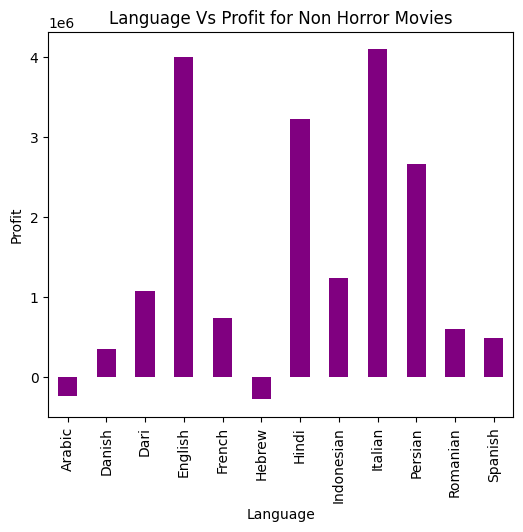

In [101]:
noHorror.groupby("language").profit.mean().plot(kind='bar', title='Language Vs Profit for Non Horror Movies', ylabel='Profit',xlabel='Language', figsize=(6, 5),color='purple')

From the above graph, we can conclude that Italian Language generates the maximum profit when non Horror Movies are made.

<b>Hypothesis Testing<b>

<b>Hypothesis: If movies are made in 'Horror' genre or has an Horror Element, then the profit earned would be more.<b>

Let $H_0$ be the Null Hypothesis and $H_1$ be the Alternate Hypothesis

$H_0$: Average profit made by horror movies is same as that of other genre movies.
<br> &emsp;&emsp; x=y OR x-y=0

$H_1$: Average profit made by horror movies is more than that of other movie genres. 
<br> &emsp;&emsp; x>y OR x-y>0
<br> &emsp;&emsp; where x is the average profit of Horror Movies and y be the average profit of all other genre movies.

The sample count is greater than 30, therefore, we can use Z Test. 
In this case, we have 2 different sample means i.e. Sample mean for Horror Genre Movies and Sample mean for Non Horror Genre Movies. 
Therefore, 2 sample Z Test would be used to commute the p value. This test assumes that the standard deviation of each population is known.

The formula for computing the Z-Score value is 
<br>z = (x–y) / √$σ_1$<sup>2</sup>/n1 + $σ_2$<sup>2</sup>/n2)
<br>where,
<br>$x_1$, $x_2$: sample means
<br>$σ_1$, $σ_2$: sample standard deviations
<br>$n_1$, $n_2$: sample sizes
<br> where, 
<br>$x_1$ = Sample Mean of Horror Movies i.e. horror_means
<br>$x_2$= Sample Mean of Non Horror Movies i.e. noHorror_means
<br>$σ_1$ = Standard Deviation of Horror Movies i.e. horror_std
<br>$σ_2$= Standard Deviation of Non Horror Movies i.e. noHorror_std
<br>$n_1$ = Count of Horror Movies i.e. horror_count
<br>$n_2$= Count of Non Horror Movies i.e. noHorror_count

We assume the null hypothesis, i.e.  x=y and then we compute the probability whether we should accept or reject the null hypothesis.

In [102]:
zValue=(horror_means-noHorror_means)/np.sqrt(((horror_std**2)/horror_count)+((noHorror_std**2)/noHorror_count))
zValue

2.796555273907199

The probability value (p-value) that we obtain will tell us how likely it is that the null hypothesis is true, i.e. that the mean budgets of Horror movies and Non Horror Movies are same. 

Obtaining p-value from z-scores (using a normal distribution)

In [103]:
p_value=1-stats.norm.cdf(zValue)
print ('One tail p value from normal: ', p_value)

One tail p value from normal:  0.0025825287586831447


The p-value is less than the significance level(0.05), therefore we can reject the null hypothesis and accept the alternate 
hypothesis i.e. Average profit made by horror movies is more than that of other movie genre.

# Summary

I examined the data thoroughly and have come up with an appropriate plan of action. I looked for movies that generated the highest profit within the proposed budget.  
<br>I examined whether there is any specific genre of film that was generally well-rated and could be made within the proposed budget. I found that the films of the genre "Horror" met the criteria of budget and is well-rated. Horror Genre was among the top genres with both critics and the users/audiences. 
<br>Among the Horror Genre, Ireland is the country which made the maximum profit and English Language movies made the maximum profit. 

<br>Based on the data analyses, I would recommend that the studio should pursue making a film in the Horror Genre or should have an element of Horror in it, releasing in English  in the Ireland market which could have a content rating of 'R'. 